In [2]:

import numpy as np

n = int(1e6)
a = np.ones(n)
b = np.ones(n)
c = np.zeros(2*n)

In [14]:
%%timeit

np.concatenate([a,b])

3.71 ms ± 73.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%%timeit
c[:n] = a
c[n:] = b

1.7 ms ± 314 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Conclusion: 

Avoid concatemnations, do preallocations and slices

## comparing hstack versus vstack

In [18]:
v = np.ones((n,1))

In [20]:
%timeit np.vstack([v,v])

4.26 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit np.hstack([v,v])

5.15 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
v = np.ones((1,n))

In [24]:
%timeit np.vstack([v,v])

4.27 ms ± 492 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit np.hstack([v,v])

4.2 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
v = np.ones((n,n))

In [ ]:
%timeit np.vstack([v,v])

In [ ]:
%timeit np.hstack([v,v])

## np.roll

In [6]:
import numpy as np
n = int(1e3)
S = np.ones((n,n), dtype=float)
%timeit np.roll(S,-1, axis=0)
%timeit np.roll(S,-1, axis=1)
%timeit S[:,:-1] = S[:,1:]
%timeit S[:-1,:] = S[1:,:]

UnboundLocalError: local variable 'S' referenced before assignment

It's slightly faster but it is not impressive

Case nearer to the implementation:

In [13]:
S = np.array([[1,2],[1,2], [1,2]])

In [18]:
S

array([[1, 2],
       [1, 2],
       [1, 2]])

In [19]:
np.roll(S, -1, axis =1)

array([[2, 1],
       [2, 1],
       [2, 1]])

In [7]:
import numpy as np

m = 10
n = 10**6
S = np.ones((n,m), dtype=float)
%timeit np.roll(S, -1, axis=1)

S = np.ones((n,m), dtype=float)
%timeit S[:, :-1] = S[:,1:]

S = np.ones((m,n), dtype=float)
%timeit np.roll(S, -1, axis=0)

S = np.ones((m,n), dtype=float)
%timeit S[:-1, :] = S[1:,:]

35.8 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.9 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.5 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.4 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
from timeit import timeit
import numpy as np

In [28]:
m = 10

number =200
times_roll = []
ns = [10**6, 10**5, 10**4, 10**3, 10**2]
times_slices = []
for n in ns:
    times_roll.append(timeit("np.roll(S, -1, axis=0)",number =100, globals = dict(S=np.ones((n,m), dtype=float), np= np)) / number)
    times_slices.append(timeit("S[:, :-1] = S[:,1:]",number =100, globals = dict(S=np.ones((n,m), dtype=float), np= np)) / number)


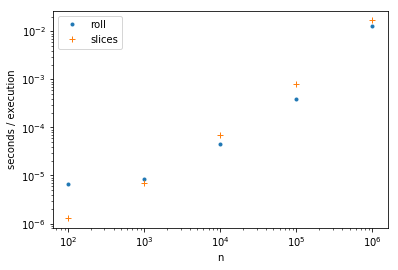

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ns, times_roll, ".",label="roll")
ax.plot(ns, times_slices, "+", label = "slices")
ax.set_ylabel("seconds / execution")
ax.set_xlabel("n")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

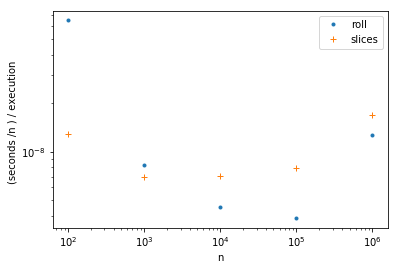

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ns, np.array(times_roll) / np.array(ns), ".",label="roll")
ax.plot(ns, np.array(times_slices)/ np.array(ns), "+", label = "slices")
ax.set_ylabel("(seconds /n ) / execution  ")
ax.set_xlabel("n")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

Good news this parallelizes well

## Use a list of vectors instead of the matrix

In [ ]:
n = 1000

gradients = [None]*maxcor
for i in range(maxcor):
    gradients[i] = np.zeros(n, dtype=float)

gradients[:-1] = gradients[1:]




In [1]:

from timeit import timeit
import numpy as np
m = 10

number =10
times_list = []
ns = [10**7, 10**6, 10**5, 10**4, 10**3, 10**2]
times_slices = []
for n in ns:
    times_list.append(timeit("gradients[:-1] = gradients[1:]",number =number, globals = dict(gradients = [np.zeros(n) for i in range(m)], np= np)) / number)
    times_slices.append(timeit("S[:, :-1] = S[:,1:]",number =number, globals = dict(S=np.ones((n,m), dtype=float), np= np)) / number)

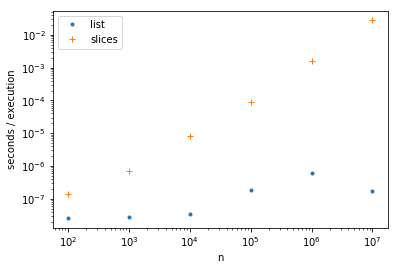

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ns, times_list, ".",label="list")
ax.plot(ns, times_slices, "+", label = "slices")
ax.set_ylabel("seconds / execution")
ax.set_xlabel("n")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

## Implementation of the dot Product

In [6]:
pnp=np
def ldot(A, B):
    """
    dot product of lists of parallel vectors
    Parameters
    ----------
    A
    B

    Returns
    -------
    C array with the dot products of the vectors

    """
    return np.array([pnp.dot(a, b) for a,b in zip(A, B)])

A =[np.array([1,2,3]),np.array([2,2,2])]
B=[np.array([4,1,1]), np.array([2,2,2])]

ldot(A,B)

array([ 9, 12])

In [9]:
np.array([[1,2,3], [4,5,6]])[0,:]

array([1, 2, 3])